In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [2]:
import matplotlib.pyplot as plt
import pandas_datareader.data as web
# collect data for Amazon from 2017-04-22 to 2018-04-22
start = '2004-08-19'
end = '2020-11-25'
df = web.DataReader(name='GOOG', data_source='yahoo', start=start, end=end)


In [3]:
import pandas as pd
df = pd.DataFrame(df)
df = df.reset_index()

In [4]:
df.head()

,Date,High,Low,Open,Close,Volume,Adj Close
0,2004-08-19,51.835709,47.800831,49.813286,49.982655,44871300.0,49.982655
1,2004-08-20,54.336334,50.062355,50.316402,53.952770,22942800.0,53.952770
2,2004-08-23,56.528118,54.321388,55.168217,54.495735,18342800.0,54.495735
3,2004-08-24,55.591629,51.591621,55.412300,52.239193,15319700.0,52.239193
4,2004-08-25,53.798351,51.746044,52.284027,52.802086,9232100.0,52.802086


In [5]:
df.tail()

,Date,High,Low,Open,Close,Volume,Adj Close
4093,2020-11-19,1769.589966,1737.005005,1738.380005,1763.920044,1249900.0,1763.920044
4094,2020-11-20,1774.000000,1741.859985,1765.209961,1742.189941,2313500.0,1742.189941
4095,2020-11-23,1753.900024,1717.719971,1749.599976,1734.859985,2161600.0,1734.859985
4096,2020-11-24,1771.599976,1727.689941,1730.500000,1768.880005,1578000.0,1768.880005
4097,2020-11-25,1778.540039,1756.540039,1772.890015,1771.430054,1045800.0,1771.430054


In [6]:
#Splitting Data into Training and Testing
#Training Data Would Be From 19-08-2004 to 31-12-2018 
df_train = df[df['Date']<'2019-1-1'].copy()
df_train

,Date,High,Low,Open,Close,Volume,Adj Close
0,2004-08-19,51.835709,47.800831,49.813286,49.982655,44871300.0,49.982655
1,2004-08-20,54.336334,50.062355,50.316402,53.952770,22942800.0,53.952770
2,2004-08-23,56.528118,54.321388,55.168217,54.495735,18342800.0,54.495735
3,2004-08-24,55.591629,51.591621,55.412300,52.239193,15319700.0,52.239193
4,2004-08-25,53.798351,51.746044,52.284027,52.802086,9232100.0,52.802086
...,...,...,...,...,...,...,...
3612,2018-12-24,1003.539978,970.109985,973.900024,976.219971,1590300.0,976.219971
3613,2018-12-26,1040.000000,983.000000,989.010010,1039.459961,2373300.0,1039.459961
3614,2018-12-27,1043.890015,997.000000,1017.150024,1043.880005,2109800.0,1043.880005
3615,2018-12-28,1055.560059,1033.099976,1049.619995,1037.079956,1414800.0,1037.079956


In [7]:
#test data
df_test = df[df['Date']>='2019-01-01'].copy()
df_test

,Date,High,Low,Open,Close,Volume,Adj Close
3617,2019-01-02,1052.319946,1015.710022,1016.570007,1045.849976,1532600.0,1045.849976
3618,2019-01-03,1056.979980,1014.070007,1041.000000,1016.059998,1841100.0,1016.059998
3619,2019-01-04,1070.839966,1027.417969,1032.589966,1070.709961,2093900.0,1070.709961
3620,2019-01-07,1074.000000,1054.760010,1071.500000,1068.390015,1981900.0,1068.390015
3621,2019-01-08,1084.560059,1060.530029,1076.109985,1076.280029,1764900.0,1076.280029
...,...,...,...,...,...,...,...
4093,2020-11-19,1769.589966,1737.005005,1738.380005,1763.920044,1249900.0,1763.920044
4094,2020-11-20,1774.000000,1741.859985,1765.209961,1742.189941,2313500.0,1742.189941
4095,2020-11-23,1753.900024,1717.719971,1749.599976,1734.859985,2161600.0,1734.859985
4096,2020-11-24,1771.599976,1727.689941,1730.500000,1768.880005,1578000.0,1768.880005


In [8]:
df_train = df_train.drop(['Date','Adj Close'],axis=1)
df_train.head()

,High,Low,Open,Close,Volume
0,51.835709,47.800831,49.813286,49.982655,44871300.0
1,54.336334,50.062355,50.316402,53.952770,22942800.0
2,56.528118,54.321388,55.168217,54.495735,18342800.0
3,55.591629,51.591621,55.412300,52.239193,15319700.0
4,53.798351,51.746044,52.284027,52.802086,9232100.0


In [9]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
df_train = scaler.fit_transform(df_train)
df_train

array([[9.44784778e-04, 0.00000000e+00, 3.30294353e-04, 1.34907815e-04,
        5.43577404e-01],
       [2.98909905e-03, 1.88269070e-03, 7.42148188e-04, 3.39307571e-03,
        2.77885613e-01],
       [4.78092870e-03, 5.42828275e-03, 4.71386823e-03, 3.83867253e-03,
        2.22150736e-01],
       ...,
       [8.11970140e-01, 7.90196475e-01, 7.92197108e-01, 8.15799919e-01,
        2.54672037e-02],
       [8.21510648e-01, 8.20249255e-01, 8.18777193e-01, 8.10219301e-01,
        1.70463908e-02],
       [8.19172450e-01, 8.12332341e-01, 8.19874096e-01, 8.09012935e-01,
        1.79975186e-02]])

In [10]:
df_train.shape[0]

3617

In [11]:
x_train=[]
y_train=[]
for i in range(60,df_train.shape[0]):
    x_train.append(df_train[i-60:i])
    y_train.append(df_train[i,0])

In [12]:
x_train,y_train = np.array(x_train),np.array(y_train)

In [13]:
x_train.shape,y_train.shape

((3557, 60, 5), (3557,))

# BUILDING LSTM

In [14]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense , LSTM , Dropout

In [43]:
regressor = Sequential()
regressor.add(LSTM(units=60,activation='relu',return_sequences=True,input_shape=(x_train.shape[1],5)))
regressor.add(Dropout(0.2))
regressor.add(LSTM(units=60,activation='relu',return_sequences=True))
regressor.add(Dropout(0.2))
regressor.add(LSTM(units=80,activation='relu',return_sequences=True))
regressor.add(Dropout(0.2))
regressor.add(LSTM(units=120,activation='relu'))
regressor.add(Dropout(0.2))
regressor.add(Dense(units=1))




In [44]:
regressor.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_4 (LSTM)                (None, 60, 60)            15840     
_________________________________________________________________
dropout_4 (Dropout)          (None, 60, 60)            0         
_________________________________________________________________
lstm_5 (LSTM)                (None, 60, 60)            29040     
_________________________________________________________________
dropout_5 (Dropout)          (None, 60, 60)            0         
_________________________________________________________________
lstm_6 (LSTM)                (None, 60, 80)            45120     
_________________________________________________________________
dropout_6 (Dropout)          (None, 60, 80)            0         
_________________________________________________________________
lstm_7 (LSTM)                (None, 120)              

In [46]:
regressor.compile(optimizer='adam',loss='mean_squared_error')

In [47]:
regressor.fit(x_train,y_train,epochs=10,batch_size=32)

Epoch 1/10
112/112 [==============================] - 15s 137ms/step - loss: 0.0104
Epoch 2/10
112/112 [==============================] - 16s 140ms/step - loss: 0.0019
Epoch 3/10
112/112 [==============================] - 15s 134ms/step - loss: 0.0018
Epoch 4/10
112/112 [==============================] - 15s 134ms/step - loss: 0.0018
Epoch 5/10
112/112 [==============================] - 15s 132ms/step - loss: 0.0016
Epoch 6/10
112/112 [==============================] - 15s 136ms/step - loss: 0.0015
Epoch 7/10
112/112 [==============================] - 15s 138ms/step - loss: 0.0013
Epoch 8/10
112/112 [==============================] - 15s 133ms/step - loss: 0.0014
Epoch 9/10
112/112 [==============================] - 15s 133ms/step - loss: 0.0012
Epoch 10/10
112/112 [==============================] - 15s 137ms/step - loss: 0.0013


# PREPARE TEST DATA SET

In [48]:
df_test.head()

,Date,High,Low,Open,Close,Volume,Adj Close
3617,2019-01-02,1052.319946,1015.710022,1016.570007,1045.849976,1532600.0,1045.849976
3618,2019-01-03,1056.979980,1014.070007,1041.000000,1016.059998,1841100.0,1016.059998
3619,2019-01-04,1070.839966,1027.417969,1032.589966,1070.709961,2093900.0,1070.709961
3620,2019-01-07,1074.000000,1054.760010,1071.500000,1068.390015,1981900.0,1068.390015
3621,2019-01-08,1084.560059,1060.530029,1076.109985,1076.280029,1764900.0,1076.280029


In [49]:
df_test.tail(60)

,Date,High,Low,Open,Close,Volume,Adj Close
4038,2020-09-02,1733.180054,1666.329956,1673.775024,1728.280029,2511200.0,1728.280029
4039,2020-09-03,1709.713989,1615.060059,1709.713989,1641.839966,3107800.0,1641.839966
4040,2020-09-04,1645.109985,1547.613037,1624.260010,1591.040039,2608600.0,1591.040039
4041,2020-09-08,1563.864990,1528.010010,1533.510010,1532.390015,2610900.0,1532.390015
4042,2020-09-09,1569.000000,1536.051025,1557.530029,1556.959961,1774700.0,1556.959961
4043,2020-09-10,1584.081055,1525.805054,1560.640015,1532.020020,1618600.0,1532.020020
4044,2020-09-11,1575.199951,1497.359985,1536.000000,1520.719971,1597100.0,1520.719971
4045,2020-09-14,1564.000000,1515.739990,1539.005005,1519.280029,1696600.0,1519.280029
4046,2020-09-15,1559.569946,1531.834961,1536.000000,1541.439941,1331100.0,1541.439941
4047,2020-09-16,1562.000000,1519.819946,1555.540039,1520.900024,1311700.0,1520.900024


In [50]:
past_60_days = df_test.tail(60)

In [51]:
df_60 = past_60_days.append(df_test,ignore_index=True)
df_60 = df_60.drop(['Date','Adj Close'],axis=1)
df_60.head()

,High,Low,Open,Close,Volume
0,1733.180054,1666.329956,1673.775024,1728.280029,2511200.0
1,1709.713989,1615.060059,1709.713989,1641.839966,3107800.0
2,1645.109985,1547.613037,1624.260010,1591.040039,2608600.0
3,1563.864990,1528.010010,1533.510010,1532.390015,2610900.0
4,1569.000000,1536.051025,1557.530029,1556.959961,1774700.0


In [52]:
inputs = scaler.transform(df_60)

In [53]:
inputs

array([[1.37547931, 1.34740532, 1.3297137 , 1.37746874, 0.03033068],
       [1.35629531, 1.30472377, 1.35913352, 1.30652969, 0.03755925],
       [1.30348017, 1.24857496, 1.28918046, 1.26483955, 0.0315108 ],
       ...,
       [1.39241832, 1.39018687, 1.39178439, 1.38286874, 0.02609483],
       [1.40688841, 1.39848674, 1.37614906, 1.41078806, 0.01902377],
       [1.41256206, 1.42250409, 1.41084974, 1.41288081, 0.01257548]])

In [54]:
x_test = []
y_test = []
for i in range(60,inputs.shape[0]):
    x_test.append(inputs[i-60:i])
    y_test.append(inputs[i,0])

In [55]:
x_test,y_test=np.array(x_test),np.array(y_test)
x_test.shape,y_test.shape

((481, 60, 5), (481,))

In [56]:
y_pred = regressor.predict(x_test)

In [57]:
scaler.scale_

array([8.17521128e-04, 8.32487534e-04, 8.18605127e-04, 8.20673293e-04,
       1.21162775e-08])

In [58]:
scale = 1/8.17521128e-04

In [59]:
y_pred = y_pred*scale
y_test = y_test*scale

In [60]:
y_pred

array([[1505.0624 ],
       [1506.2129 ],
       [1501.4473 ],
       [1490.0428 ],
       [1472.2769 ],
       [1448.9187 ],
       [1420.9806 ],
       [1389.6045 ],
       [1355.8694 ],
       [1320.7733 ],
       [1285.3007 ],
       [1250.3767 ],
       [1216.7783 ],
       [1185.1732 ],
       [1155.9663 ],
       [1129.3914 ],
       [1105.5254 ],
       [1084.4038 ],
       [1065.9083 ],
       [1049.8228 ],
       [1035.9763 ],
       [1024.3057 ],
       [1014.7316 ],
       [1007.17053],
       [1001.529  ],
       [ 997.61145],
       [ 995.0573 ],
       [ 993.4928 ],
       [ 992.6074 ],
       [ 992.2375 ],
       [ 992.30194],
       [ 992.7252 ],
       [ 993.4297 ],
       [ 994.3323 ],
       [ 995.3476 ],
       [ 996.34094],
       [ 997.22766],
       [ 997.9837 ],
       [ 998.60565],
       [ 999.10785],
       [ 999.53845],
       [1000.0119 ],
       [1000.6596 ],
       [1001.6203 ],
       [1002.9835 ],
       [1004.7116 ],
       [1006.6831 ],
       [1008.

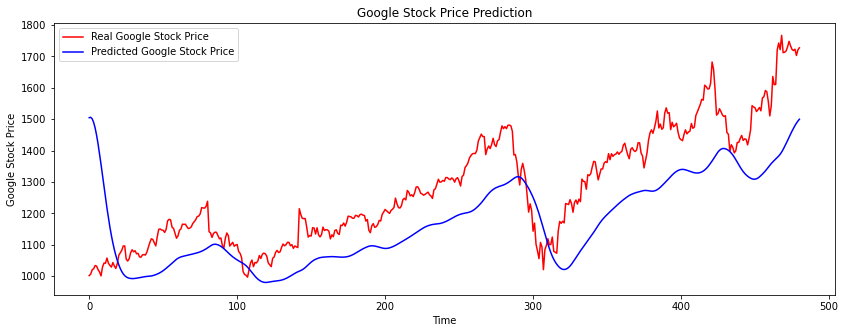

In [61]:
# Visualising the results
plt.figure(figsize=(14,5))
plt.plot(y_test, color = 'red', label = 'Real Google Stock Price')
plt.plot(y_pred, color = 'blue', label = 'Predicted Google Stock Price')
plt.title('Google Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Google Stock Price')
plt.legend()
plt.show()

In [62]:
from sklearn.metrics import r2_score
r2_score(y_test,y_pred)

16/16 [==============================] - 1s 39ms/step - loss: 1657942.6250


1657942.625